<a href="https://colab.research.google.com/github/bd0525/new2GPR/blob/main/001basic_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Basic Statistical Concepts

I will begin with some fundamental statistical concepts that will serve as the foundation for all future operations. This type of review will always be useful whenever you are uncertain about something. Additionally, it's important to become familiar with commonly used data analysis libraries, such as [NumPy](https://numpy.org/doc/stable/user/index.html#user),&nbsp;[Pandas](https://pandas.pydata.org/docs/getting_started/index.html),&nbsp;[SciPy](https://scipy.org/),&nbsp;[Scikit-Learn](https://scikit-learn.org/stable/),&nbsp;and [others](https://guides.lib.uci.edu/dataanalysis/pythonlibraries)&nbsp;\(a list of Python libraries for data analysis is available on the [UCI Library website](https://www.lib.uci.edu/)\).

Since our goal is to understand Gaussian Processes for machine learning, we will focus on supervised learning, where each input has a corresponding output. To do this, let's start by defining a training dataset&nbsp;$D=\{(x_i,y_i)|i=0,...,n\}$, with $n$ observations. To explore these concepts, we will generate random data to examine properties like mean, variance, covariance and so forth, laying the groundwork for deeper insights into Gaussian Processes.

[[ 2.37381902 -7.61347917]
 [ 9.15496501 -8.59838052]
 [ 9.24180112 -5.92904576]
 [ 9.11006613 -9.94552812]
 [ 3.38682764 -6.79073872]
 [ 4.45200755  2.40786746]
 [ 5.11628897 -8.52861328]
 [ 0.38081903  2.44505326]
 [ 8.99935699  2.82421814]
 [ 6.19231168  0.96474178]
 [ 2.86317101 -5.53308096]
 [ 6.05889843 -8.56864669]
 [-0.70769792 -0.5292847 ]
 [ 1.07006522 -8.51448938]
 [ 1.13975721  2.17710162]
 [ 5.67431733 -0.19661304]
 [-0.21427007 -9.98122988]
 [ 3.55024612 -7.54027004]
 [ 5.21350243  2.37752669]
 [ 9.78470123  1.30972264]]


(-10.0, 3.0)

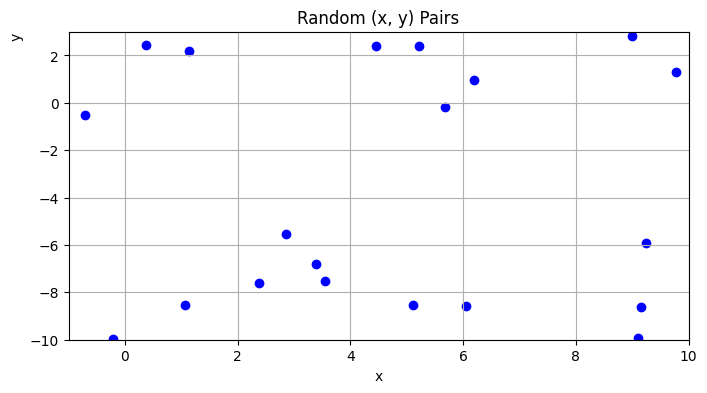

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of pairs you would like
num_pairs = 20

# Set the range for x and y coordinates
x_min, x_max = -1, 10
y_min, y_max = -10, 3

# Generate random numbers for x and y coordinates
x = np.random.uniform(x_min, x_max, num_pairs)
y = np.random.uniform(y_min, y_max, num_pairs)
# Make x, y into pairs
pairs = np.column_stack((x, y))

print(pairs)

# Plotting the (x,y) pair
fig, ax = plt.subplots(figsize=(8, 4)) # Set the figure size
ax.scatter(x, y, color='blue')  # Plot x and y as (blue) scatter plot
ax.set_title('Random (x, y) Pairs')
ax.set_xlabel('x')
ax.set_ylabel('y', loc='top')
ax.grid(True)
ax.set_xlim(x_min, x_max)  # The limits for x-axis
ax.set_ylim(y_min, y_max)  # The limits for y-axis

For a set of $(x,y)$ pair, or for any dataset, we should always focus on several key statistical characteristics that provide insights into the data:

**Mean:** The average of the $x$ values and the $y$ values. Calculate the mean using [np.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html);<br>

**Variance:** The spread of the $x$ and $y$ values. Calculate the variance using [np.var()](https://numpy.org/doc/stable/reference/generated/numpy.var.html);<br>

**Standard Deviation:** The square root of the variance, epresenting how much the $x$ and $y$ values deviate from their respective means. Calculate the standard deviation using [np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html);<br>

**Covariance:** How the $x$ and $y$ values vary together. Calculate the covariance using [np.cov(x, y)](https://numpy.org/doc/stable/reference/generated/numpy.cov.html);<br>
&nbsp;&nbsp;&nbsp;Covariance Matrix:
$$
\begin{bmatrix}
\operatorname{Var}(x) & \operatorname{Cov}(x,y) \\
\operatorname{Cov}(y,x) & \operatorname{Var}(y)
\end{bmatrix}
$$<br>

**Correlation:** The strength and direction of the linear relationship between $x$ and $y$. Calculate the correlation using [np.corrcoef(x, y)](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).<br>
&nbsp;&nbsp;&nbsp;Correlation Matrix:
$$
\begin{bmatrix}
1 & \operatorname{Corr}(x,y) \\
\operatorname{Corr}(y,x) & 1
\end{bmatrix}
$$<br>

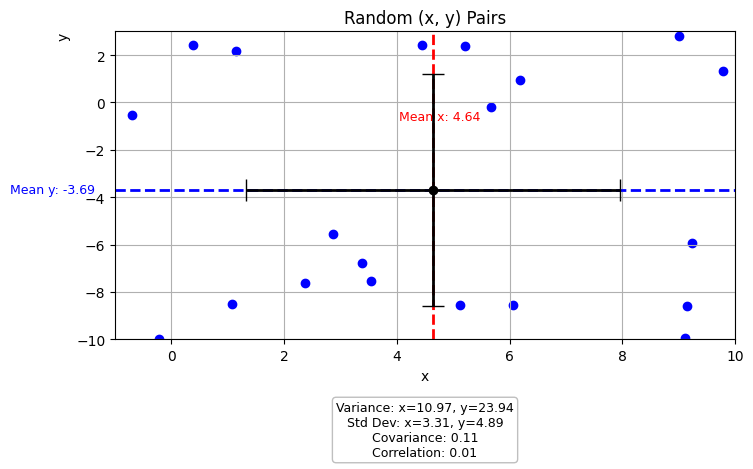

In [ ]:
# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the variance of x and y
var_x = np.var(x)
var_y = np.var(y)

# Calculate the standard deviation of x and y
std_x = np.std(x)
std_y = np.std(y)

# Calculate the covariance
cov_xy = np.cov(x, y)[0, 1] # Check above Covariance matrix, element[0,1] is Cov(x, y)

# Calculate the correlation
corr_xy = np.corrcoef(x, y)[0, 1]

# Update the plot
ax.axvline(x=mean_x, color='r', linestyle='--', linewidth=2, label='Mean x')
ax.axhline(y=mean_y, color='b', linestyle='--', linewidth=2, label='Mean y')

ax.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='o', color='black', capsize=8, elinewidth=2)# Error bars for standard deviation

ax.annotate(f'Mean x: {mean_x:.2f}', xy=(mean_x, 0), xycoords='data', xytext=(5, -15),
             textcoords='offset points', ha='center', va='bottom', color='red', fontsize=9)
ax.annotate(f'Mean y: {mean_y:.2f}', xy=(0, mean_y), xycoords='data', xytext=(-55, 0),
             textcoords='offset points', ha='right', va='center', color='blue', fontsize=9)

# Displaying additional statistics
stats_text = f'Variance: x={var_x:.2f}, y={var_y:.2f}\nStd Dev: x={std_x:.2f}, y={std_y:.2f}\nCovariance: {cov_xy:.2f}\nCorrelation: {corr_xy:.2f}'
ax.text(0.5, -0.2, stats_text, transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white', alpha=0.5))

display(fig)

For statistical visualization, [matplotlib](https://https://matplotlib.org/stable/users/index) is indeed a powerful tool. However, mastering [matplotlib]((https://https://matplotlib.org/stable/users/index)) and using it for statistical visualization requires a significant amount of practice, and it may take numerous attempts to create an aesthetically pleasing graph. No worries, there are also tools built on top of matplotlib that are specifically targeted at statistical visualization, such as [seaborn](https://https://seaborn.pydata.org/tutorial.html).

# B. Probability Theory

A brief introduction to **conditional probability**: the conditional probability of an event B is the probability that event B will occur given that event A has already occurred, written as $P(B \mid A)$.

First column name  | Second column name
-------------------|------------------
Row 1, Col 1       | Row 1, Col 2
Row 2, Col 1       | Row 2, Col 2

# C. Reference


[1]&nbsp;Williams, C. K., & Rasmussen, C. E. (2006). Gaussian processes for machine learning (Vol. 2, No. 3, p. 4). Cambridge, MA: MIT press<br>


**Note:** As a non-native English speaker, the language of this manuscript was reviewed and refined with the assistance of ChatGPT.